# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [49]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [50]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [51]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64


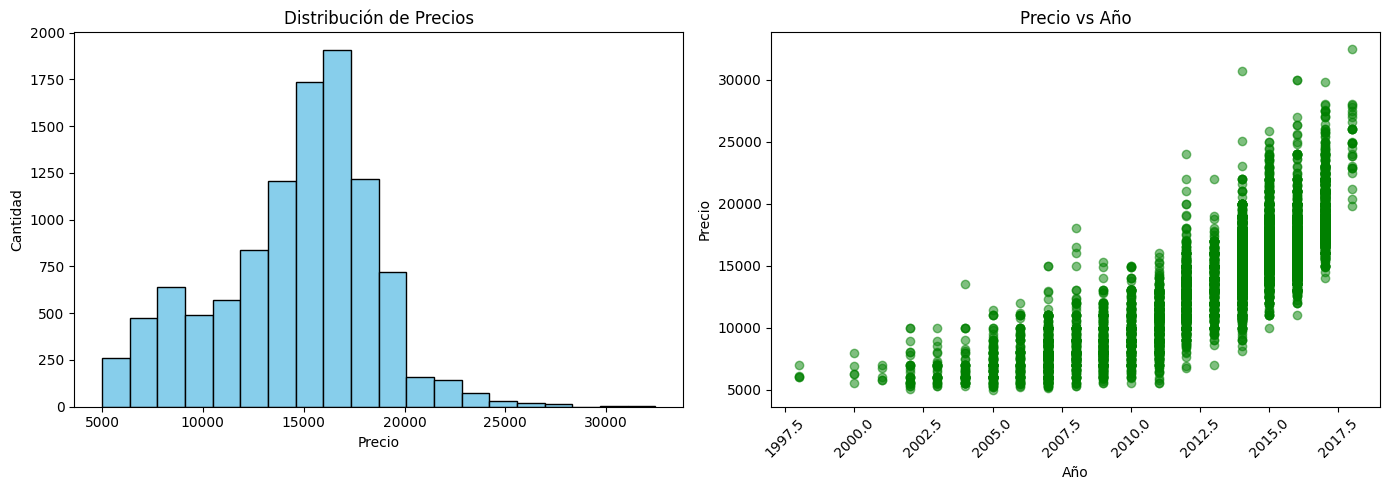

In [52]:


print(data.isnull().sum())

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)  
plt.hist(data['Price'], bins=20, color='skyblue', edgecolor='black')  
plt.xlabel('Precio')  
plt.ylabel('Cantidad')  
plt.title('Distribución de Precios')  


plt.subplot(1, 2, 2)  
plt.scatter(data['Year'], data['Price'], alpha=0.5, color='green')  
plt.xlabel('Año') 
plt.ylabel('Precio')  
plt.title('Precio vs Año')
plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show()

### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [53]:


modelo_basico = RandomForestRegressor(random_state=42)
modelo_basico.fit(X_train, y_train)

predicciones_basicas = modelo_basico.predict(X_test)

error_basico = np.sqrt(mean_squared_error(y_test, predicciones_basicas))
r2_basico = r2_score(y_test, predicciones_basicas)

print(f"Error: ${error_basico:.2f}")
print(f"R²: {r2_basico:.4f}")
print(f"\nEl modelo explica el {r2_basico*100:.1f}% de los datos")

Error: $1765.41
R²: 0.7962

El modelo explica el 79.6% de los datos


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

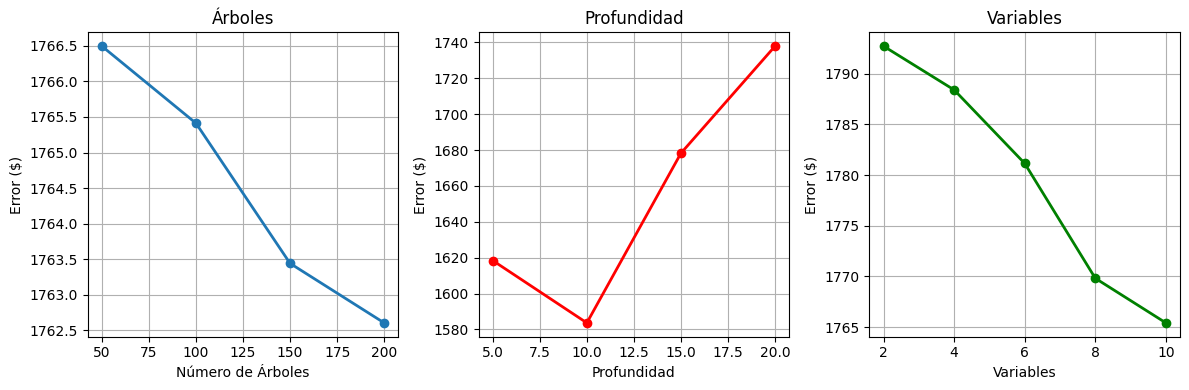

Mejor número de árboles: 200
Mejor profundidad: 10
Mejor número de variables: 10


In [54]:


valores_arboles = [50, 100, 150, 200]
errores_arboles = []

for num_arboles in valores_arboles:
    modelo_temporal = RandomForestRegressor(n_estimators=num_arboles, random_state=42)
    modelo_temporal.fit(X_train, y_train)
    predicciones_temp = modelo_temporal.predict(X_test)
    errores_arboles.append(np.sqrt(mean_squared_error(y_test, predicciones_temp)))



valores_profundidad = [5, 10, 15, 20]
errores_profundidad = []

for profundidad in valores_profundidad:
    modelo_temporal = RandomForestRegressor(max_depth=profundidad, random_state=42)
    modelo_temporal.fit(X_train, y_train)
    predicciones_temp = modelo_temporal.predict(X_test)
    errores_profundidad.append(np.sqrt(mean_squared_error(y_test, predicciones_temp)))


valores_variables = [2, 4, 6, 8, 10]
errores_variables = []

for num_variables in valores_variables:
    modelo_temporal = RandomForestRegressor(max_features=num_variables, random_state=42)
    modelo_temporal.fit(X_train, y_train)
    predicciones_temp = modelo_temporal.predict(X_test)
    errores_variables.append(np.sqrt(mean_squared_error(y_test, predicciones_temp)))


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(valores_arboles, errores_arboles, 'o-', linewidth=2)
plt.xlabel('Número de Árboles')
plt.ylabel('Error ($)')
plt.title('Árboles')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(valores_profundidad, errores_profundidad, 'o-', color='red', linewidth=2)
plt.xlabel('Profundidad')
plt.ylabel('Error ($)')
plt.title('Profundidad')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(valores_variables, errores_variables, 'o-', color='green', linewidth=2)
plt.xlabel('Variables')
plt.ylabel('Error ($)')
plt.title('Variables')
plt.grid(True)

plt.tight_layout()
plt.show()


mejor_num_arboles = valores_arboles[errores_arboles.index(min(errores_arboles))]
mejor_profundidad = valores_profundidad[errores_profundidad.index(min(errores_profundidad))]
mejor_num_variables = valores_variables[errores_variables.index(min(errores_variables))]

print(f"Mejor número de árboles: {mejor_num_arboles}")
print(f"Mejor profundidad: {mejor_profundidad}")
print(f"Mejor número de variables: {mejor_num_variables}")

In [55]:


modelo_mejorado = RandomForestRegressor(
    n_estimators=mejor_num_arboles,
    max_depth=mejor_profundidad,
    max_features=mejor_num_variables,
    random_state=42
)

modelo_mejorado.fit(X_train, y_train)
predicciones_mejoradas = modelo_mejorado.predict(X_test)


error_mejorado = np.sqrt(mean_squared_error(y_test, predicciones_mejoradas))
r2_mejorado = r2_score(y_test, predicciones_mejoradas)

print(f"Error mejorado: ${error_mejorado:.2f}")
print(f"R² mejorado: {r2_mejorado:.4f}")
print(f"\nMejora: ${error_basico - error_mejorado:.2f}")

Error mejorado: $1582.14
R² mejorado: 0.8364

Mejora: $183.27


      Variable  Importancia
0         Year     0.772020
1      Mileage     0.188863
8   M_CamryXLE     0.016950
6    M_CamryLE     0.008665
2      M_Camry     0.008032
7    M_CamrySE     0.003862
5     M_CamryL     0.000680
3   M_Camry4dr     0.000629
4  M_CamryBase     0.000299


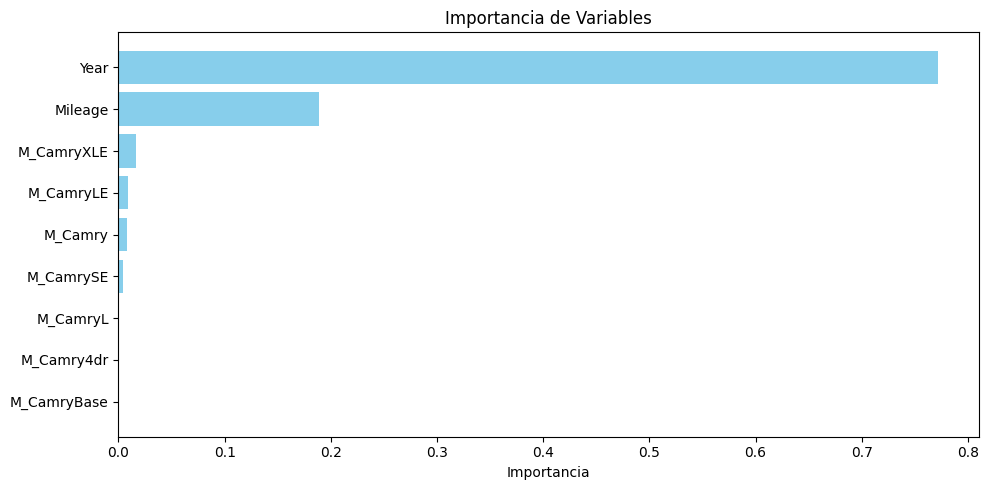

In [56]:


importancias_variables = modelo_mejorado.feature_importances_
tabla_importancia = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias_variables
}).sort_values('Importancia', ascending=False)

print(tabla_importancia)


plt.figure(figsize=(10, 5))
plt.barh(tabla_importancia['Variable'], tabla_importancia['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de Variables')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

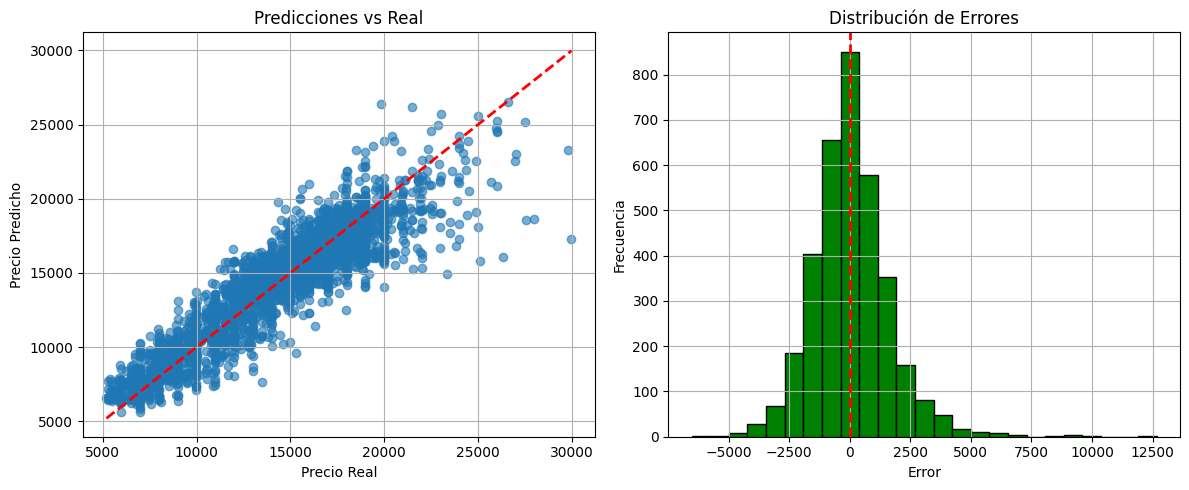

CONCLUSIONES

1. Error del modelo: $1582.14
2. R²: 0.8364 (83.6%)
3. Mejores parámetros: 200 árboles, profundidad 10
4. Variable más importante: Year


In [57]:


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, predicciones_mejoradas, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs Real')
plt.grid(True)

plt.subplot(1, 2, 2)
errores_prediccion = y_test - predicciones_mejoradas
plt.hist(errores_prediccion, bins=25, color='green', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True)

plt.tight_layout()
plt.show()

print("CONCLUSIONES")
print(f"\n1. Error del modelo: ${error_mejorado:.2f}")
print(f"2. R²: {r2_mejorado:.4f} ({r2_mejorado*100:.1f}%)")
print(f"3. Mejores parámetros: {mejor_num_arboles} árboles, profundidad {mejor_profundidad}")
print(f"4. Variable más importante: {tabla_importancia.iloc[0]['Variable']}")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.